In [0]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

sns.set()


In [1366]:
url='https://raw.githubusercontent.com/rylp/data_sets/master/loan_pred_data/train_ctrUa4K.csv'
df_train=pd.read_csv(url)
df_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [1367]:
url='https://raw.githubusercontent.com/rylp/data_sets/master/loan_pred_data/test_lAUu6dG.csv'
df_test=pd.read_csv(url)
df_test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [0]:
#combine train and test data

df_train['source'] = 'train'
df_test['source'] = 'test'

In [1369]:
print(df_train.head(3))
print(df_test.head(3))

    Loan_ID Gender Married  ... Property_Area Loan_Status source
0  LP001002   Male      No  ...         Urban           Y  train
1  LP001003   Male     Yes  ...         Rural           N  train
2  LP001005   Male     Yes  ...         Urban           Y  train

[3 rows x 14 columns]
    Loan_ID Gender Married  ... Credit_History Property_Area source
0  LP001015   Male     Yes  ...            1.0         Urban   test
1  LP001022   Male     Yes  ...            1.0         Urban   test
2  LP001031   Male     Yes  ...            1.0         Urban   test

[3 rows x 13 columns]


In [1370]:
df = pd.concat([df_train,df_test] , axis=0, ignore_index=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test


In [1371]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [1372]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Credit_History        79
Self_Employed         55
LoanAmount            27
Dependents            25
Gender                24
Loan_Amount_Term      20
Married                3
source                 0
Property_Area          0
CoapplicantIncome      0
ApplicantIncome        0
Education              0
Loan_ID                0
dtype: int64

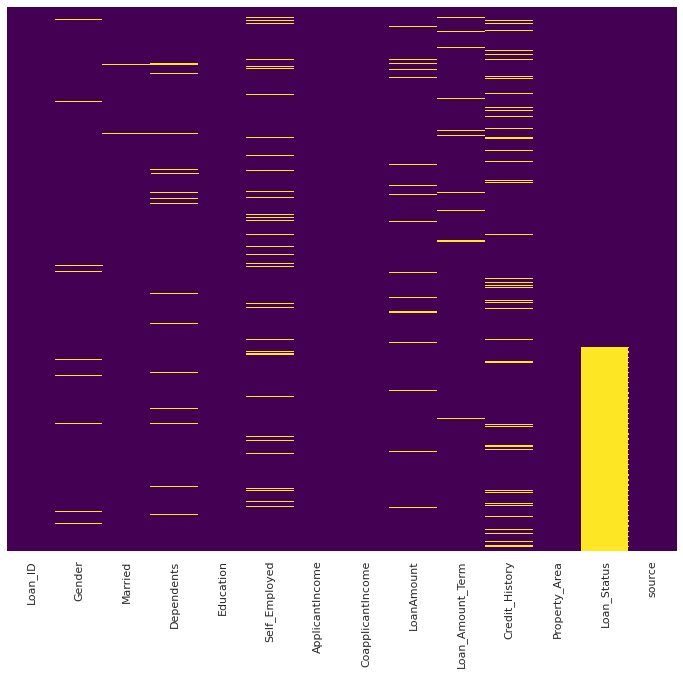

In [1373]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

In [1374]:
df.apply(lambda x: len(x.unique()))

Loan_ID              981
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            3
source                 2
dtype: int64

In [1375]:
#Displaying value_counts for each categorical feature

for col in df:
  if df.dtypes[col]=='object':
    print(df[col].value_counts())


LP001312    1
LP001514    1
LP002925    1
LP002288    1
LP001994    1
           ..
LP002096    1
LP002759    1
LP002517    1
LP001183    1
LP001358    1
Name: Loan_ID, Length: 981, dtype: int64
Male      775
Female    182
Name: Gender, dtype: int64
Yes    631
No     347
Name: Married, dtype: int64
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
No     807
Yes    119
Name: Self_Employed, dtype: int64
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
train    614
test     367
Name: source, dtype: int64


In [1376]:
#Corelation matrix
corr = df.corr().round(2)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00,-0.11,0.55,-0.02,0.02
CoapplicantIncome,-0.11,1.00,0.18,-0.04,-0.03
LoanAmount,0.55,0.18,1.00,0.06,-0.01
Loan_Amount_Term,-0.02,-0.04,0.06,1.00,-0.02
Credit_History,0.02,-0.03,-0.01,-0.02,1.00


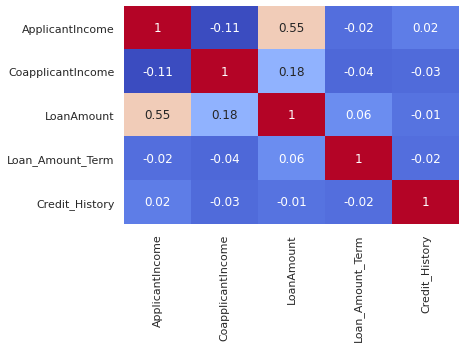

In [1377]:
#HeatMap for co-relation
sns.heatmap(df.corr().round(2), cmap='coolwarm', annot=True, cbar=False)
plt.show()

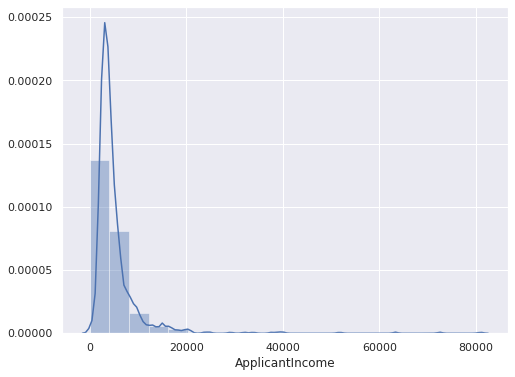

In [1378]:
#The distribution is not normal

plt.figure(figsize=(8,6))
sns.distplot(df['ApplicantIncome'].dropna(), bins=20)
plt.show()

In [1379]:
#creating log_total_income_feature

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['log_Total_Income'] = np.log1p(df['Total_Income'])
df['log_Total_Income']

0      8.674197
1      8.714732
2      8.006701
3      8.505525
4      8.699681
         ...   
976    8.663369
977    8.490438
978    8.564840
979    8.908424
980    9.127067
Name: log_Total_Income, Length: 981, dtype: float64

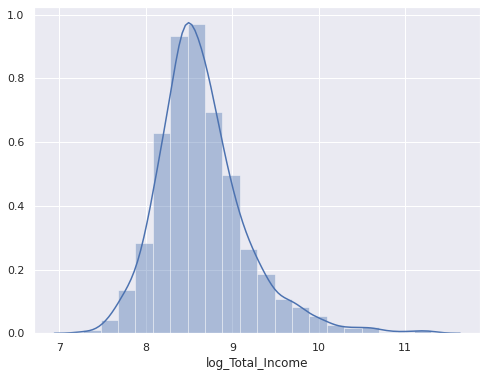

In [1380]:
#Now, the distribution is normal
plt.figure(figsize=(8,6))
sns.distplot(df['log_Total_Income'].dropna(), bins=20)
plt.show()

In [1381]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train,6091.0,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train,4941.0,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train,6000.0,8.699681


In [1382]:
#Cleaning Loan_amount by replacing by mean value

mean_loan_amt = df['LoanAmount'].dropna().mean()
mean_loan_amt


142.51153039832286

In [0]:
df['LoanAmount'].fillna(mean_loan_amt,inplace=True)

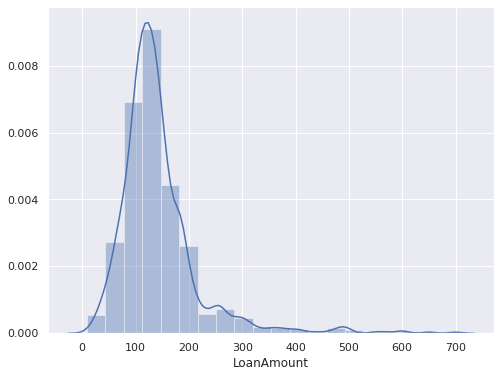

In [1384]:
plt.figure(figsize=(8,6))
sns.distplot(df['LoanAmount'], bins=20)
plt.show()

In [1385]:
#Creating log_LoanAmount for better normal distribution

df['log_Loan_Amount'] = np.log1p(df['LoanAmount'])
df['log_Loan_Amount']

0      4.966415
1      4.859812
2      4.204693
3      4.795791
4      4.955827
         ...   
976    4.736198
977    4.753590
978    4.844187
979    5.068904
980    4.595120
Name: log_Loan_Amount, Length: 981, dtype: float64

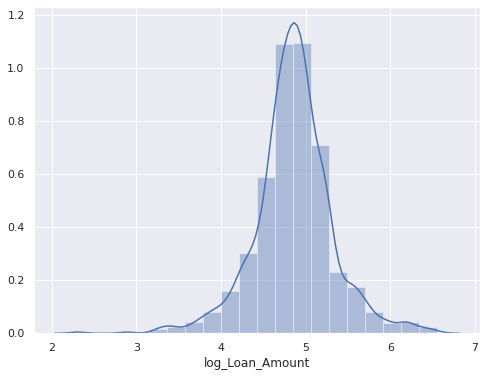

In [1386]:
#This distribution is more normal and less skewed

plt.figure(figsize=(8,6))
sns.distplot(df['log_Loan_Amount'], bins=20)
plt.show()

In [1387]:
#Cleaning up gender
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [0]:
df['Gender'] = df_train['Gender'].map({'Male':'M', 'Female':'F'})

In [1389]:
df['Gender'].dropna().value_counts()

M    489
F    112
Name: Gender, dtype: int64

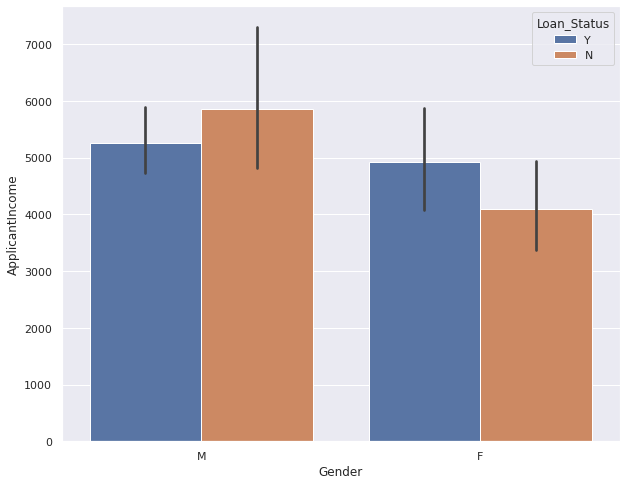

In [1390]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Gender'].dropna() , y=df_train['ApplicantIncome'], hue=df_train['Loan_Status'])
plt.show()

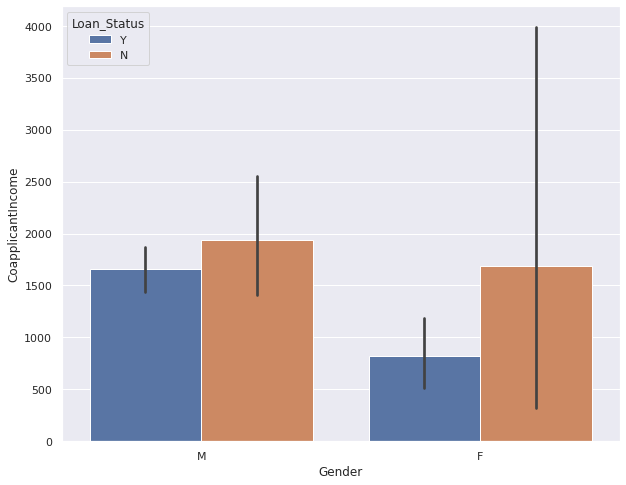

In [1391]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Gender'].dropna() , y=df['CoapplicantIncome'], hue=df['Loan_Status'])
plt.show()

In [0]:
#Inference-
#1.More the applicant income , more the chances of acceptance 
#2.More the co-applicant income more chances of rejection , lesser among females tho

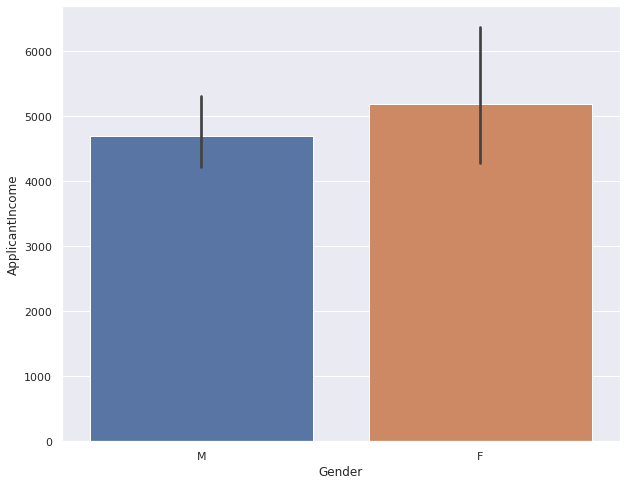

In [1393]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Gender'].dropna() , y=df_test['ApplicantIncome'])
plt.show()

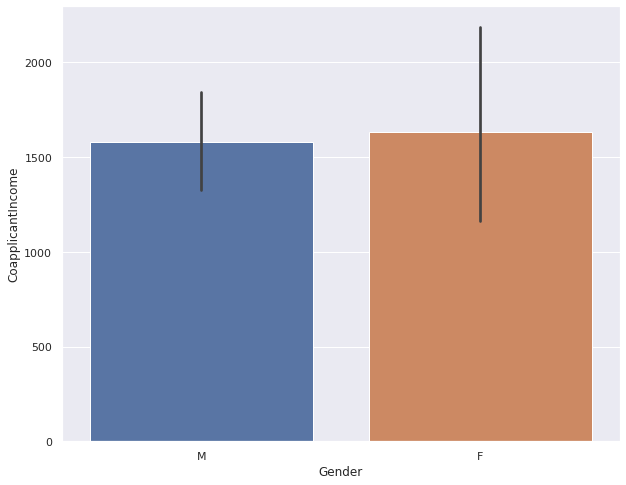

In [1394]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Gender'].dropna() , y=df_test['CoapplicantIncome'])
plt.show()

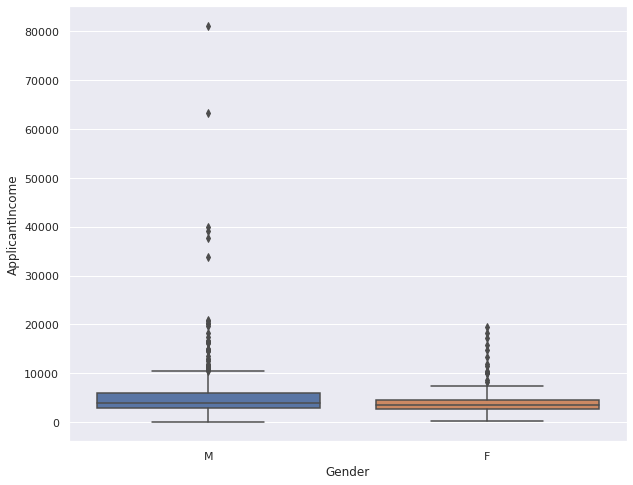

In [1395]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Gender'].dropna(), y=df_train['ApplicantIncome'])

In [0]:
#Inference- Applicant incomes above 20K indicate male 

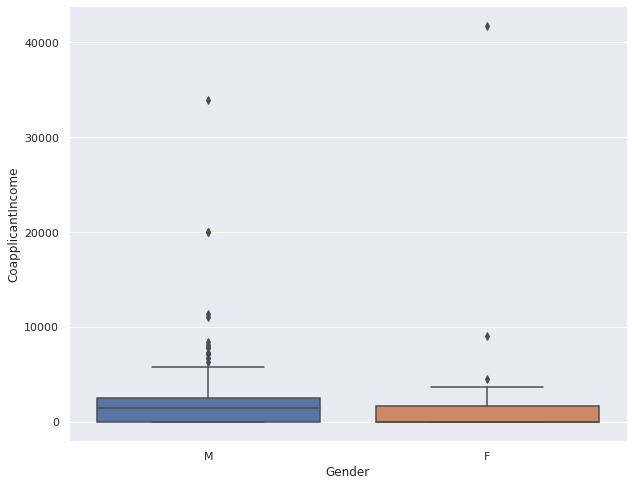

In [1397]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Gender'].dropna(), y=df_train['CoapplicantIncome'].dropna())

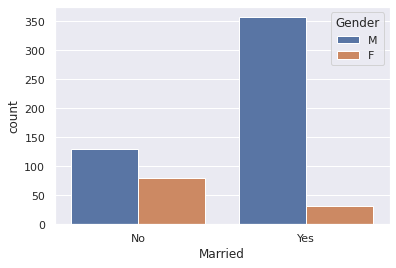

In [1398]:
sns.countplot(x=df['Married'].dropna(), hue=df['Gender'])

In [0]:
#Inference- If married, more probable to be a man

In [1400]:
df['Dependents'].dropna().value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

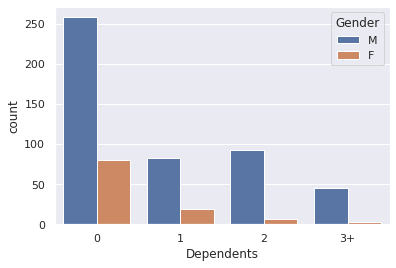

In [1401]:
sns.countplot(x=df['Dependents'].dropna(), hue=df['Gender'])

In [0]:
#Inference - If depenedents are 3+ , 2, 1 huge chances of male

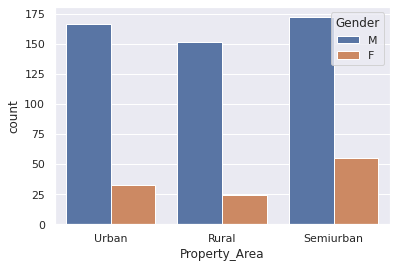

In [1403]:
sns.countplot(x=df['Property_Area'], hue=df['Gender'])

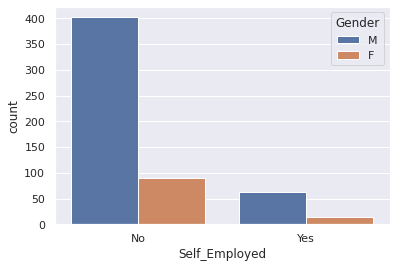

In [1404]:
sns.countplot(x=df['Self_Employed'], hue=df['Gender'])

In [0]:
#Inference for below function
#1. if dependent are 3+ or 2 or 1 => assign Male
#2. if income is greater than 20000 => assign Male

In [0]:
def assign_gender(cols):
  gender=cols[0]
  income=cols[1]
  depend = cols[2]
  marriage = cols[3]

  if pd.isnull(gender):

    if income > 16000:
      gender='M'
      return gender

    else:
      if pd.notnull(depend):
        if depend == '3+':
          gender='M'
          return gender

        elif depend=='2':
          gender='M'
          return gender

        else:
          if depend=='1':
            gender='M'
            return gender

          elif marriage == 'Yes':
            gender='M'
            return gender
          
          else:
            gender='F'
            return gender

      else:
        if marriage=='Yes':
           gender='M'
           return gender

        else:
          gender='F'
          return gender

  else:
    return gender


In [0]:
df['Gender'] = df[['Gender','ApplicantIncome','Dependents','Married']].apply(assign_gender,axis=1)

In [1408]:
df.iloc[[23,126,171,188,314,334,460,467,477,507,576,588,592],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
23,LP001050,M,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,train,5282.0,8.572249,4.727388
126,LP001448,M,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,train,23803.0,10.077609,5.916202
171,LP001585,M,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,train,51763.0,10.854450,6.552508
188,LP001644,M,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,train,5970.0,8.694670,5.129899
314,LP002024,M,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N,train,4316.0,8.370316,5.075174
334,LP002103,M,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y,train,11666.0,9.364520,5.209486
460,LP002478,M,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y,train,6166.0,8.726968,5.081404
467,LP002501,M,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y,train,16692.0,9.722745,4.709530
477,LP002530,M,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N,train,4745.0,8.465057,4.890349
507,LP002625,F,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N,train,3583.0,8.184235,4.574711


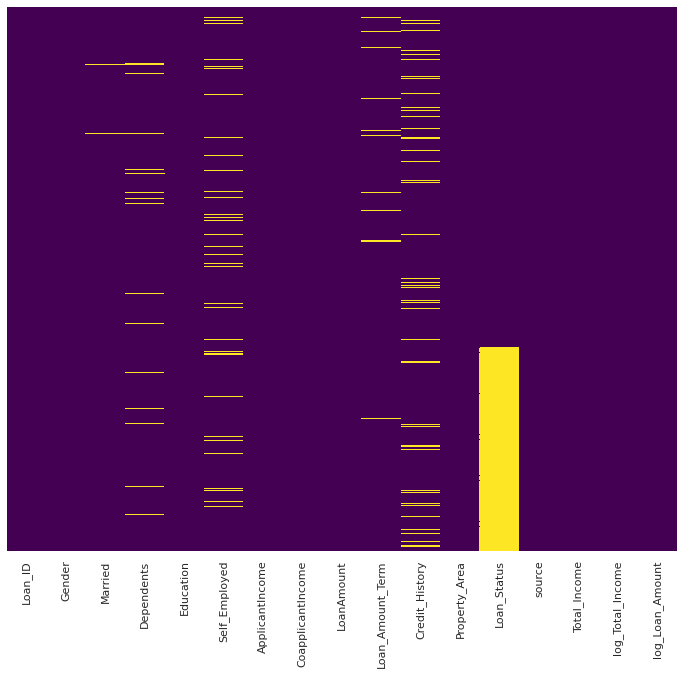

In [1409]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

In [0]:
#Cleaning Self-Employed

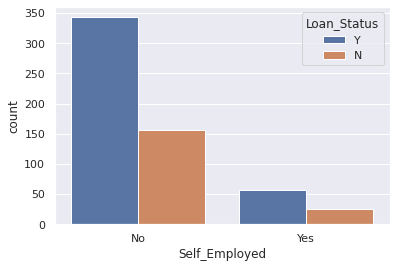

In [1411]:
sns.countplot(x=df['Self_Employed'], hue=df['Loan_Status'])

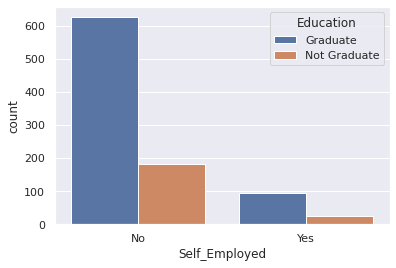

In [1412]:
sns.countplot(x=df['Self_Employed'], hue=df['Education'])

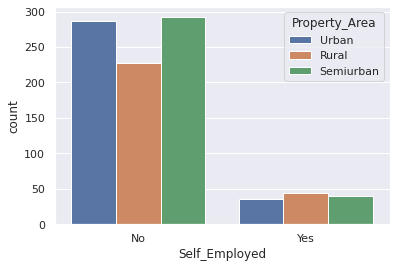

In [1413]:
sns.countplot(x=df['Self_Employed'], hue=df['Property_Area'])

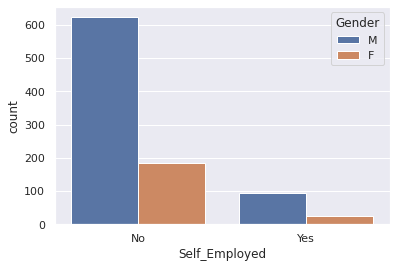

In [1414]:
sns.countplot(x=df['Self_Employed'], hue=df['Gender'])

In [0]:
#Dropping Self-Empployed

#df.drop(['Self_Employed'],axis=1,inplace=True)
#df.head(3)

In [0]:
#Cleaning Credit history


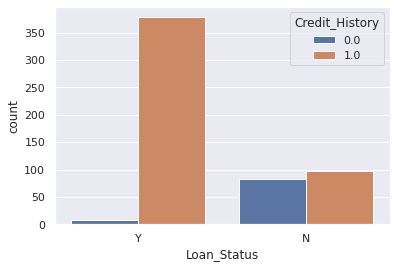

In [1416]:
sns.countplot(x=df['Loan_Status'], hue=df['Credit_History'])
#So, if u have credit history 1.0 better chances of loan accepted

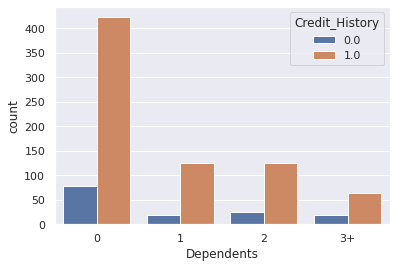

In [1417]:
sns.countplot(x=df['Dependents'].dropna(), hue=df['Credit_History'])
#if dependents are 3+, credit history tends to be 1

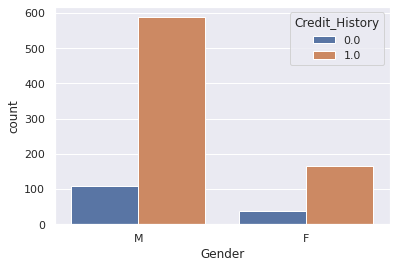

In [1418]:
sns.countplot(x=df['Gender'].dropna(), hue=df['Credit_History'])
#If it is a female, credit history is very unlikely to be 0

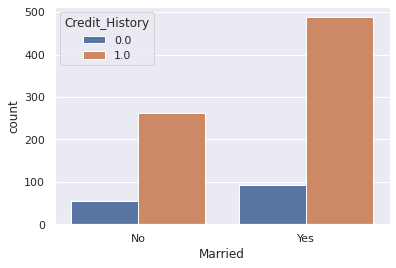

In [1419]:
sns.countplot(x=df['Married'].dropna(), hue=df['Credit_History'])
#If it is a female, credit history is very unlikely to be 0

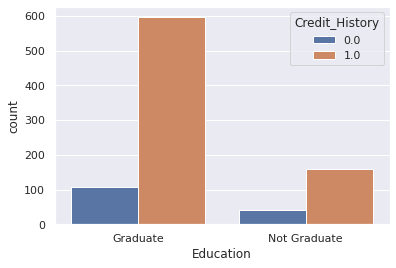

In [1420]:
sns.countplot(x=df['Education'].dropna(), hue=df['Credit_History'])
#If it is a female, credit history is very unlikely to be 0

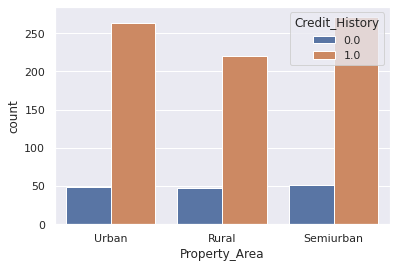

In [1421]:
sns.countplot(x=df['Property_Area'].dropna(), hue=df['Credit_History'])

In [1422]:
df['Credit_History'].mean()

0.835920177383592

In [1423]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [0]:
df['Credit_History'] = df['Credit_History'].fillna(1)

In [1425]:
filt = df['Credit_History']==0
df[filt]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
7,LP001014,M,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,train,5540.0,8.619930,5.068904
17,LP001036,F,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,train,3510.0,8.163656,4.343805
20,LP001043,M,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N,train,7660.0,8.943898,4.653960
22,LP001047,M,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N,train,4511.0,8.414496,4.762174
23,LP001050,M,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,train,5282.0,8.572249,4.727388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,LP002774,M,Yes,0,Not Graduate,No,1700,2900.0,67.0,360.0,0.0,Urban,NaN,test,4600.0,8.434029,4.219508
939,LP002802,F,No,0,Graduate,No,2875,2416.0,95.0,6.0,0.0,Semiurban,NaN,test,5291.0,8.573952,4.564348
953,LP002858,F,No,0,Graduate,No,4333,2333.0,162.0,360.0,0.0,Rural,NaN,test,6666.0,8.804925,5.093750
960,LP002879,M,Yes,0,Graduate,No,3391,1966.0,133.0,360.0,0.0,Rural,NaN,test,5357.0,8.586346,4.897840


In [1426]:
df.isnull().sum().sort_values(ascending=False)

Loan_Status          367
Self_Employed         55
Dependents            25
Loan_Amount_Term      20
Married                3
log_Loan_Amount        0
ApplicantIncome        0
Gender                 0
Education              0
LoanAmount             0
CoapplicantIncome      0
log_Total_Income       0
Credit_History         0
Property_Area          0
source                 0
Total_Income           0
Loan_ID                0
dtype: int64

In [1427]:
#Loan_Amount_Term

df['Loan_Amount_Term'].value_counts()


360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

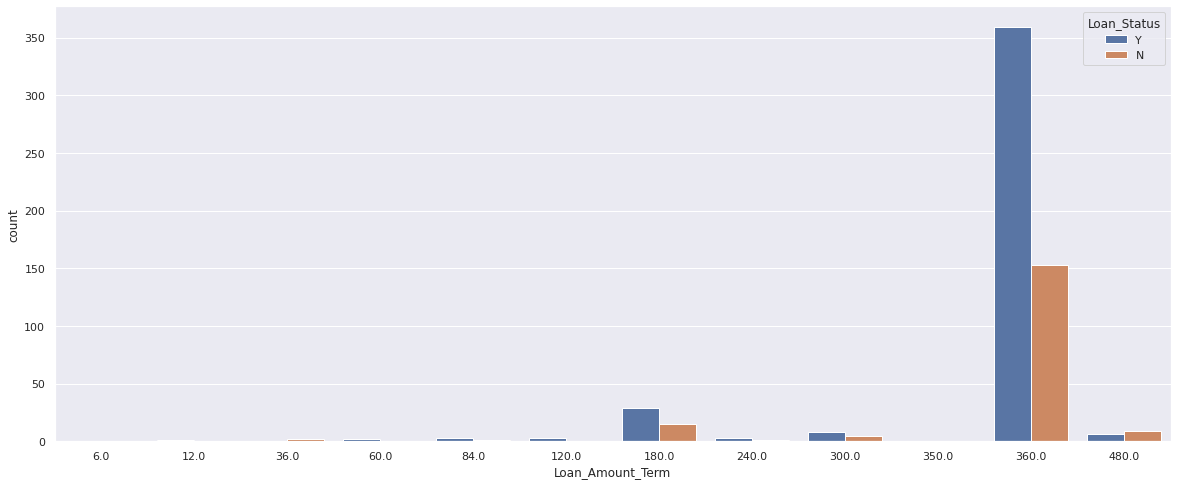

In [1428]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Loan_Amount_Term'], hue=df['Loan_Status'])

In [1429]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
0,LP001002,M,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train,5849.0,8.674197,4.966415
1,LP001003,M,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train,6091.0,8.714732,4.859812
2,LP001005,M,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train,3000.0,8.006701,4.204693
3,LP001006,M,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train,4941.0,8.505525,4.795791
4,LP001008,M,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train,6000.0,8.699681,4.955827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,M,Yes,3+,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,NaN,test,5786.0,8.663369,4.736198
977,LP002975,M,Yes,0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,NaN,test,4867.0,8.490438,4.753590
978,LP002980,F,No,0,Graduate,No,3250,1993.0,126.00000,360.0,1.0,Semiurban,NaN,test,5243.0,8.564840,4.844187
979,LP002986,M,Yes,0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,NaN,test,7393.0,8.908424,5.068904


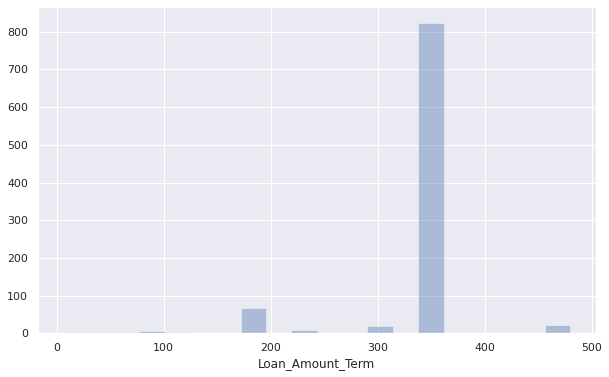

In [1430]:
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount_Term'], kde=False, bins=20)
plt.show()

In [1431]:
#Dependents

df['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

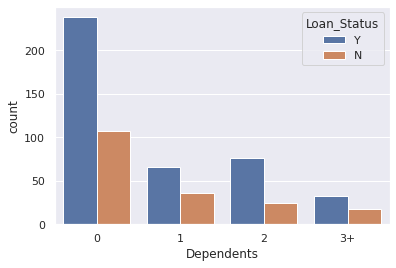

In [1432]:
sns.countplot(x=df['Dependents'], hue=df['Loan_Status'])

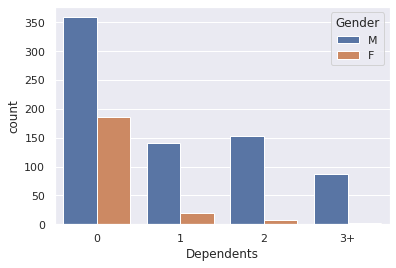

In [1433]:
sns.countplot(x=df['Dependents'], hue=df['Gender'])
#women mostly have 0 dependents

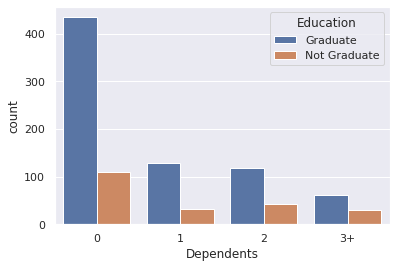

In [1434]:
sns.countplot(x=df['Dependents'], hue=df['Education'])
#women mostly have 0 dependents

In [0]:
df['Dependents'] = df['Dependents'].replace('3+','3')

In [1436]:
df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [0]:
df['Dependents']  = df['Dependents'].map({'2':2,'1':1,'0':0,'3':3})

In [1438]:
df['Dependents'].value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [1439]:
dependents_mode = df['Dependents'].mode()
dependents_mode

0    0.0
dtype: float64

In [0]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [1441]:
df['Dependents'].value_counts()

0.0    570
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [1442]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
Total_Income           0
log_Total_Income       0
log_Loan_Amount        0
dtype: int64

In [1443]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
0,LP001002,M,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train,5849.0,8.674197,4.966415
1,LP001003,M,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train,6091.0,8.714732,4.859812
2,LP001005,M,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train,3000.0,8.006701,4.204693


In [1444]:
filt = df['Married'].isnull()

df[filt]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
104,LP001357,M,NaN,0.0,Graduate,No,3816,754.0,160.00000,360.0,1.0,Urban,Y,train,4570.0,8.427487,5.081404
228,LP001760,M,NaN,0.0,Graduate,No,4758,0.0,158.00000,480.0,1.0,Semiurban,Y,train,4758.0,8.467793,5.068904
435,LP002393,F,NaN,0.0,Graduate,No,10047,0.0,142.51153,240.0,1.0,Semiurban,Y,train,10047.0,9.215129,4.966415


In [0]:
df.iloc[[104,228,435],2] = 'Yes'

In [1446]:
df.iloc[[104,228,435],:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
104,LP001357,M,Yes,0.0,Graduate,No,3816,754.0,160.00000,360.0,1.0,Urban,Y,train,4570.0,8.427487,5.081404
228,LP001760,M,Yes,0.0,Graduate,No,4758,0.0,158.00000,480.0,1.0,Semiurban,Y,train,4758.0,8.467793,5.068904
435,LP002393,F,Yes,0.0,Graduate,No,10047,0.0,142.51153,240.0,1.0,Semiurban,Y,train,10047.0,9.215129,4.966415


In [1447]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
source                 0
Total_Income           0
log_Total_Income       0
log_Loan_Amount        0
dtype: int64

In [1448]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount
0,LP001002,M,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train,5849.0,8.674197,4.966415
1,LP001003,M,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train,6091.0,8.714732,4.859812
2,LP001005,M,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train,3000.0,8.006701,4.204693
3,LP001006,M,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train,4941.0,8.505525,4.795791
4,LP001008,M,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train,6000.0,8.699681,4.955827


In [0]:
#Cleaning loan amount term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

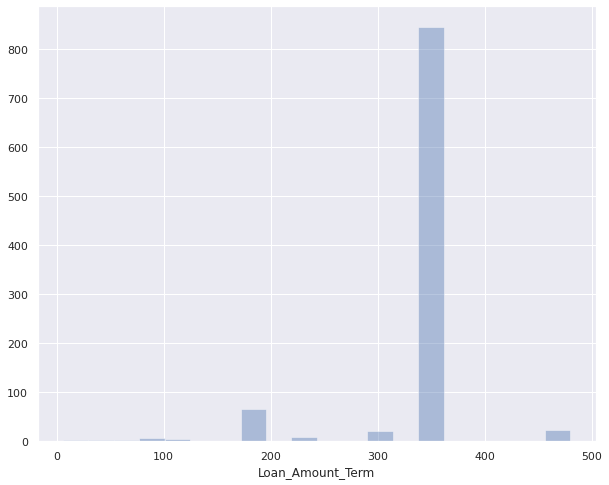

In [1450]:
plt.figure(figsize=(10,8))
sns.distplot(df['Loan_Amount_Term'], kde=False, bins=20)
plt.show()

In [1451]:
#Creating log
df['log_Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])
df['log_Loan_Amount_Term']

0      5.888878
1      5.888878
2      5.888878
3      5.888878
4      5.888878
         ...   
976    5.888878
977    5.888878
978    5.888878
979    5.888878
980    5.198497
Name: log_Loan_Amount_Term, Length: 981, dtype: float64

In [1452]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,Total_Income,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term
0,LP001002,M,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,train,5849.0,8.674197,4.966415,5.888878
1,LP001003,M,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,train,6091.0,8.714732,4.859812,5.888878
2,LP001005,M,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,train,3000.0,8.006701,4.204693,5.888878
3,LP001006,M,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,train,4941.0,8.505525,4.795791,5.888878
4,LP001008,M,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,train,6000.0,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,M,Yes,3.0,Not Graduate,Yes,4009,1777.0,113.00000,360.0,1.0,Urban,NaN,test,5786.0,8.663369,4.736198,5.888878
977,LP002975,M,Yes,0.0,Graduate,No,4158,709.0,115.00000,360.0,1.0,Urban,NaN,test,4867.0,8.490438,4.753590,5.888878
978,LP002980,F,No,0.0,Graduate,No,3250,1993.0,126.00000,360.0,1.0,Semiurban,NaN,test,5243.0,8.564840,4.844187,5.888878
979,LP002986,M,Yes,0.0,Graduate,No,5000,2393.0,158.00000,360.0,1.0,Rural,NaN,test,7393.0,8.908424,5.068904,5.888878


In [0]:
#drop

df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'], axis=1,inplace=True)
df.drop(['Self_Employed'], axis=1,inplace=True)

df.drop(['Gender', 'Education','Married'],axis=1,inplace=True)

In [1454]:
df

,Loan_ID,Dependents,Credit_History,Property_Area,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term
0,LP001002,0.0,1.0,Urban,Y,train,8.674197,4.966415,5.888878
1,LP001003,1.0,1.0,Rural,N,train,8.714732,4.859812,5.888878
2,LP001005,0.0,1.0,Urban,Y,train,8.006701,4.204693,5.888878
3,LP001006,0.0,1.0,Urban,Y,train,8.505525,4.795791,5.888878
4,LP001008,0.0,1.0,Urban,Y,train,8.699681,4.955827,5.888878
...,...,...,...,...,...,...,...,...,...
976,LP002971,3.0,1.0,Urban,NaN,test,8.663369,4.736198,5.888878
977,LP002975,0.0,1.0,Urban,NaN,test,8.490438,4.753590,5.888878
978,LP002980,0.0,1.0,Semiurban,NaN,test,8.564840,4.844187,5.888878
979,LP002986,0.0,1.0,Rural,NaN,test,8.908424,5.068904,5.888878


In [0]:
var_mod = ['Property_Area','Dependents']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [1456]:
df.head()

,Loan_ID,Dependents,Credit_History,Property_Area,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term
0,LP001002,0,1.0,2,Y,train,8.674197,4.966415,5.888878
1,LP001003,1,1.0,0,N,train,8.714732,4.859812,5.888878
2,LP001005,0,1.0,2,Y,train,8.006701,4.204693,5.888878
3,LP001006,0,1.0,2,Y,train,8.505525,4.795791,5.888878
4,LP001008,0,1.0,2,Y,train,8.699681,4.955827,5.888878


In [1457]:
df = pd.get_dummies(df, columns=['Property_Area','Dependents'], drop_first=True)
df.head(5)

,Loan_ID,Credit_History,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,LP001002,1.0,Y,train,8.674197,4.966415,5.888878,0,1,0,0,0
1,LP001003,1.0,N,train,8.714732,4.859812,5.888878,0,0,1,0,0
2,LP001005,1.0,Y,train,8.006701,4.204693,5.888878,0,1,0,0,0
3,LP001006,1.0,Y,train,8.505525,4.795791,5.888878,0,1,0,0,0
4,LP001008,1.0,Y,train,8.699681,4.955827,5.888878,0,1,0,0,0


In [1458]:
df.dtypes

Loan_ID                  object
Credit_History          float64
Loan_Status              object
source                   object
log_Total_Income        float64
log_Loan_Amount         float64
log_Loan_Amount_Term    float64
Property_Area_1           uint8
Property_Area_2           uint8
Dependents_1              uint8
Dependents_2              uint8
Dependents_3              uint8
dtype: object

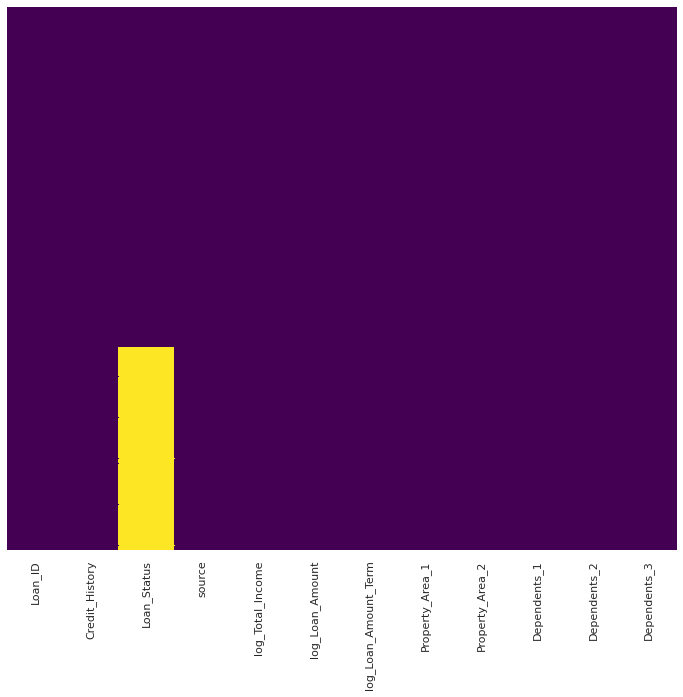

In [1459]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis' , cbar=False , yticklabels=False)
plt.show()

In [0]:
#HERE

In [0]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [0]:
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

In [1463]:
train

,Loan_ID,Credit_History,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,LP001002,1.0,Y,train,8.674197,4.966415,5.888878,0,1,0,0,0
1,LP001003,1.0,N,train,8.714732,4.859812,5.888878,0,0,1,0,0
2,LP001005,1.0,Y,train,8.006701,4.204693,5.888878,0,1,0,0,0
3,LP001006,1.0,Y,train,8.505525,4.795791,5.888878,0,1,0,0,0
4,LP001008,1.0,Y,train,8.699681,4.955827,5.888878,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,Y,train,7.972811,4.276666,5.888878,0,0,0,0,0
610,LP002979,1.0,Y,train,8.320448,3.713572,5.198497,0,0,0,0,1
611,LP002983,1.0,Y,train,9.025576,5.537334,5.888878,0,1,1,0,0
612,LP002984,1.0,Y,train,8.933796,5.236442,5.888878,0,1,0,1,0


In [1464]:
test

,Loan_ID,Credit_History,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
614,LP001015,1.0,NaN,test,8.651899,4.709530,5.888878,0,1,0,0,0
615,LP001022,1.0,NaN,test,8.428799,4.844187,5.888878,0,1,1,0,0
616,LP001031,1.0,NaN,test,8.824825,5.342334,5.888878,0,1,0,1,0
617,LP001035,1.0,NaN,test,8.494334,4.615121,5.888878,0,1,0,1,0
618,LP001051,1.0,NaN,test,8.094684,4.369448,5.888878,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1.0,NaN,test,8.663369,4.736198,5.888878,0,1,0,0,1
977,LP002975,1.0,NaN,test,8.490438,4.753590,5.888878,0,1,0,0,0
978,LP002980,1.0,NaN,test,8.564840,4.844187,5.888878,1,0,0,0,0
979,LP002986,1.0,NaN,test,8.908424,5.068904,5.888878,0,0,0,0,0


In [1465]:
test.reset_index(inplace=True ,drop=True)
test

,Loan_ID,Credit_History,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,LP001015,1.0,NaN,test,8.651899,4.709530,5.888878,0,1,0,0,0
1,LP001022,1.0,NaN,test,8.428799,4.844187,5.888878,0,1,1,0,0
2,LP001031,1.0,NaN,test,8.824825,5.342334,5.888878,0,1,0,1,0
3,LP001035,1.0,NaN,test,8.494334,4.615121,5.888878,0,1,0,1,0
4,LP001051,1.0,NaN,test,8.094684,4.369448,5.888878,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,NaN,test,8.663369,4.736198,5.888878,0,1,0,0,1
363,LP002975,1.0,NaN,test,8.490438,4.753590,5.888878,0,1,0,0,0
364,LP002980,1.0,NaN,test,8.564840,4.844187,5.888878,1,0,0,0,0
365,LP002986,1.0,NaN,test,8.908424,5.068904,5.888878,0,0,0,0,0


In [0]:
y_train = train['Loan_Status']

In [1467]:
y_train

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [1468]:
y_train = y_train.map({'Y':1,'N':0})
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [1469]:
train.drop(['Loan_ID','Loan_Status','source'], axis=1,inplace=True)
train.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Credit_History,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,1.0,8.674197,4.966415,5.888878,0,1,0,0,0
1,1.0,8.714732,4.859812,5.888878,0,0,1,0,0
2,1.0,8.006701,4.204693,5.888878,0,1,0,0,0


In [1470]:
test.head(3)

,Loan_ID,Credit_History,Loan_Status,source,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,LP001015,1.0,NaN,test,8.651899,4.709530,5.888878,0,1,0,0,0
1,LP001022,1.0,NaN,test,8.428799,4.844187,5.888878,0,1,1,0,0
2,LP001031,1.0,NaN,test,8.824825,5.342334,5.888878,0,1,0,1,0


In [1471]:
loan_ids = test.iloc[:,0]
loan_ids

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [1472]:
test.drop(['Loan_ID','Loan_Status','source'], axis=1,inplace=True)
test.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Credit_History,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,1.0,8.651899,4.709530,5.888878,0,1,0,0,0
1,1.0,8.428799,4.844187,5.888878,0,1,1,0,0
2,1.0,8.824825,5.342334,5.888878,0,1,0,1,0


In [1473]:
train.head(3)

,Credit_History,log_Total_Income,log_Loan_Amount,log_Loan_Amount_Term,Property_Area_1,Property_Area_2,Dependents_1,Dependents_2,Dependents_3
0,1.0,8.674197,4.966415,5.888878,0,1,0,0,0
1,1.0,8.714732,4.859812,5.888878,0,0,1,0,0
2,1.0,8.006701,4.204693,5.888878,0,1,0,0,0


In [1474]:
x_trai,x_test,y_trai,y_test=train_test_split(train,y_train,train_size=0.7,random_state=42)

print(x_trai.shape)
print(type(x_trai))
print(y_trai.shape)
print(type(y_trai))
print(x_test.shape)
print(type(x_test))
print(y_test.shape)
print(type(y_test))

(429, 9)
<class 'pandas.core.frame.DataFrame'>
(429,)
<class 'pandas.core.series.Series'>
(185, 9)
<class 'pandas.core.frame.DataFrame'>
(185,)
<class 'pandas.core.series.Series'>


In [0]:
#model=LogisticRegression(max_iter=2500)
#model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=200,max_depth=50,random_state=42)
#model = GaussianNB()
#model = ExtraTreesClassifier(n_estimators=200,max_depth=50,random_state=42)
#model = SVC()
#model = XGBClassifier()

In [1476]:
model.fit(x_trai,y_trai)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1477]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0])

In [1478]:
metrics.accuracy_score(y_test,y_pred)

0.8054054054054054

In [1479]:
cnf = confusion_matrix(y_test,y_pred)
cnf

array([[ 34,  31],
       [  5, 115]])

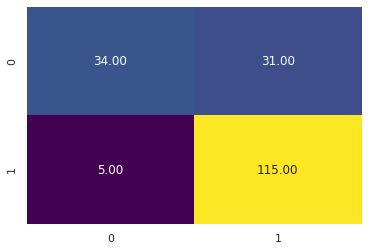

In [1480]:
sns.heatmap(cnf, annot=True, cmap='viridis', cbar=False, fmt='.2f')

In [1481]:
model.fit(train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1482]:
y_predicted = model.predict(test)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [1483]:
predicted = pd.DataFrame({'Loan_Status':y_predicted})
predicted

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [1484]:
predicted['Loan_Status']= predicted['Loan_Status'].map({1:'Y',0:'N'})
predicted

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [1485]:
submit=pd.DataFrame({'Loan_ID':loan_ids, 'Loan_Status':predicted['Loan_Status']})
submit

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [0]:
#submit.to_csv('submission3_v3.csv', index=False)

In [0]:
#from google.colab import files
#files.download("submission3_v3.csv")